### Desafío Data Science - Juliana Plácido

#### Notebook I
Exploración primaria de datos

In [1]:
#Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Levantamos la base de datos
df = pd.read_csv('dataset_SCL .csv')

/Users/jplacido/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#Vemos la forma de nuestra base:
df.shape

(68206, 18)

In [4]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1.0,1.0,2017.0,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2.0,1.0,2017.0,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3.0,1.0,2017.0,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4.0,1.0,2017.0,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5.0,1.0,2017.0,Jueves,I,American Airlines,Santiago,Miami


In [5]:
#Queremos ver los valores faltantes por columna
def missing_values():
    temp_dict = dict()
    for i in df.columns:
        if df[i].isnull().sum() > 0: 
            temp_dict[i] = df[i].isnull().sum()
    return temp_dict

missing_values()

{'Vlo-I': 39,
 'Ori-I': 39,
 'Des-I': 39,
 'Emp-I': 39,
 'Fecha-O': 39,
 'Vlo-O': 40,
 'Ori-O': 39,
 'Des-O': 39,
 'Emp-O': 39,
 'DIA': 39,
 'MES': 39,
 'AÑO': 39,
 'DIANOM': 39,
 'TIPOVUELO': 39,
 'OPERA': 39,
 'SIGLAORI': 39,
 'SIGLADES': 39}

Text(0.5, 1.0, 'Cant. de vuelos por dia de la semana')

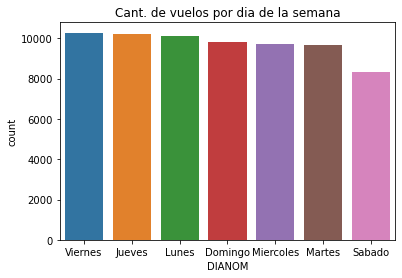

In [8]:
#Cantidad de vuelos por día de semana?
sns.countplot(x = 'DIANOM', data = df, order = df['DIANOM'].value_counts().index) 
plt.title('Cant. de vuelos por dia de la semana')

In [16]:
df.DIANOM.value_counts(normalize = True)

Viernes      0.150791
Jueves       0.150175
Lunes        0.148606
Domingo      0.143706
Miercoles    0.142606
Martes       0.141593
Sabado       0.122523
Name: DIANOM, dtype: float64

Text(0.5, 1.0, 'Vuelos por Aerolínea')

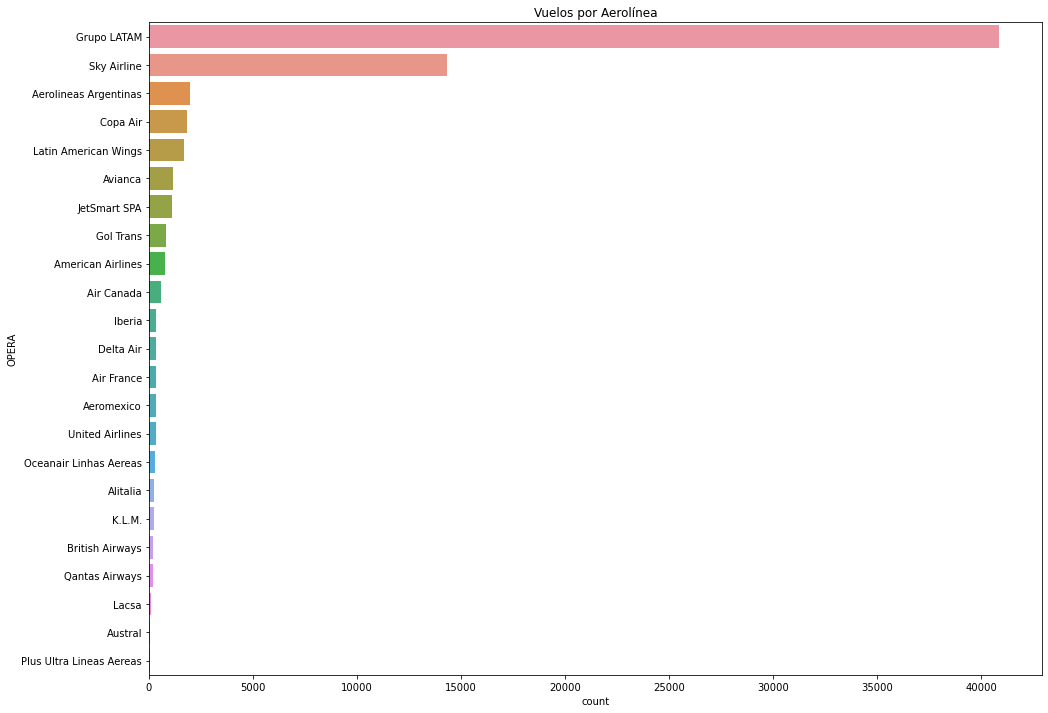

In [15]:
#Qué aerolíneas tenemos en consideración?
plt.figure(figsize=(16, 12))
sns.countplot(y = 'OPERA', data = df, order = df['OPERA'].value_counts().index) 
plt.title('Vuelos por Aerolínea')

In [42]:
#Cant de vuelos por aerolínea
df.OPERA.value_counts()

Grupo LATAM                 40854
Sky Airline                 14298
Aerolineas Argentinas        1949
Copa Air                     1850
Latin American Wings         1674
Avianca                      1152
JetSmart SPA                 1095
Gol Trans                     806
American Airlines             757
Air Canada                    565
Iberia                        362
Delta Air                     358
Air France                    358
Aeromexico                    351
United Airlines               335
Oceanair Linhas Aereas        278
Alitalia                      259
K.L.M.                        251
British Airways               205
Qantas Airways                195
Lacsa                          92
Austral                        74
Plus Ultra Lineas Aereas       49
Name: OPERA, dtype: int64

In [24]:
#Tipo de vuelo:
display(df.TIPOVUELO.value_counts())
display(df.TIPOVUELO.value_counts(normalize = True)) #Vemos mas vuelos nacionales que internacionales

N    36966
I    31201
Name: TIPOVUELO, dtype: int64

N    0.542286
I    0.457714
Name: TIPOVUELO, dtype: float64

In [26]:
df.TIPOVUELO.unique()

array(['I', 'N', nan], dtype=object)

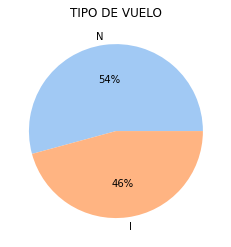

In [39]:
#Para hacer pie chart:
data = df.TIPOVUELO.value_counts()
labels = df.TIPOVUELO.value_counts().index
colors = sns.color_palette('pastel')[0:5]
plt.title('TIPO DE VUELO')
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()


In [40]:
df.describe()

,DIA,MES,AÑO
count,68167.000000,68167.000000,68167.000000
mean,15.714906,6.620359,2017.000029
std,8.782835,3.522783,0.005417
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


In [44]:
df.SIGLAORI.unique() #Chequeamos que todos los vuelos considerados provengan del aeropuerto de SLC

array(['Santiago', nan], dtype=object)

In [52]:
df['Ori-O'].value_counts() #Verificamos con la columna correspondiente

SCEL    68167
Name: Ori-O, dtype: int64

In [45]:
df.SIGLADES.unique() #Listamos las ciudades de destino

array(['Miami', 'Dallas', 'Buenos Aires', 'Toronto', 'Paris',
       'Ciudad de Mexico', 'Bogota', 'Roma', 'Londres',
       'Ciudad de Panama', 'Atlanta', 'Sao Paulo', 'Rio de Janeiro',
       'Florianapolis', 'Madrid', 'Lima', 'Sydney', 'Houston', 'Asuncion',
       'Cataratas Iguacu', 'Puerto Montt', 'Punta Arenas',
       'Puerto Natales', 'Balmaceda', 'Temuco', 'Valdivia', 'Concepcion',
       'La Serena', 'Copiapo', 'Calama', 'Antofagasta', 'Iquique',
       'Arica', 'Mendoza', 'Cordoba', 'Montevideo', 'Castro (Chiloe)',
       'Osorno', 'Orlando', 'Nueva York', 'Guayaquil', 'Cancun',
       'Punta Cana', 'Los Angeles', 'Auckland N.Z.', 'Isla de Pascua',
       'La Paz', 'Santa Cruz', nan, 'Quito', 'Bariloche', 'Rosario',
       'Washington', 'Tucuman', 'Melbourne', 'Neuquen', 'Ushuia',
       'Puerto Stanley', 'Punta del Este', 'Cochabamba'], dtype=object)

In [60]:
df['Des-I'].unique()

array(['KMIA', 'KDFW', 'SAEZ', 'CYYZ', 'LFPG', 'MMMX', 'SABE', 'SKBO',
       'LIRF', 'EGLL', 'MPTO', 'KATL', 'SBGR', 'SBGL', 'SBFL', 'LEMD',
       'SPJC', 'YSSY', 'KIAH', 'SGAS', 'SBFI', 'SCTE', 'SCCI', 'SCNT',
       'SCBA', 'SCVD', 'SCQP', 'SCIE', 'SCSE', 'SCAT', 'SCCF', 'SCFA',
       'SCDA', 'SCAR', 'SAME', 'SACO', 'SUMU', 'SCPQ', 'SCJO', 'KMCO',
       'KJFK', 'SEGU', 'MMUN', 'MDPC', 'KLAX', 'NZAA', 'SCIP', 'SLLP',
       'SLVR', nan, 'SEQM', 'SAZS', 'SAAR', 'SANT', 'YMML', 'SEQU',
       'SAZN', 'SAWH', 'EGYP', 'SULS', 'SLCB', 'SARI'], dtype=object)

In [47]:
#Ciudades de destino: 
df.SIGLADES.value_counts(normalize = True)

Buenos Aires        0.092934
Antofagasta         0.084880
Lima                0.077310
Calama              0.075491
Puerto Montt        0.063917
Concepcion          0.058577
Iquique             0.054968
Sao Paulo           0.052357
Temuco              0.037980
Arica               0.035736
La Serena           0.035354
Punta Arenas        0.030880
Ciudad de Panama    0.027139
Copiapo             0.026112
Mendoza             0.023839
Bogota              0.023530
Rio de Janeiro      0.021051
Montevideo          0.015638
Cordoba             0.015007
Miami               0.014905
Madrid              0.013115
Balmaceda           0.012308
Valdivia            0.011046
Ciudad de Mexico    0.010269
Isla de Pascua      0.006631
Guayaquil           0.006191
Nueva York          0.005604
Auckland N.Z.       0.005296
Paris               0.005266
Atlanta             0.005252
Dallas              0.005237
Houston             0.004900
Toronto             0.004152
Osorno              0.003799
Roma          

Primeras conclusiones de la rápida evaluación de los datos:
1. Los vuelos son del año 2017
2. Tenemos más vuelos nacionales que internacionales (no vemos una gran diferencia)
3. Aproximadamente un 60% de los vuelos son operados por LATAM
4. El día de la semana con menos vuelos es el sábado
5. El destino más solicitado es Buenos Aires, seguido por Antofagasta (Ciudad portuaria y capital regional en un área minera del Desierto de Atacama, en el norte de Chile)
6. No tenemos un valor significativo de valores faltantes
7. Hay columnas que tienen información repetida (ej SIGLAORI y Ori-O) que al ser columnas categóricas, no nos suman información en un posible modelo. 
8. Los meses con más vuelos son diciembre y enero (meses de vacaciones, temporada alta)
9. Los viernes y jueves son los días con más vuelos (las personas prefieren aprovechar la semana completa comenzando el fin de semana), seguidos por los lunes y domingos(podrían ser los días en los cuales regresan)